In [2]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("./data/sentimentdataset.csv")
dataset

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


## Data Cleaning

In [4]:
# Check unique sentiment values
sentiments = dataset['Sentiment'].unique()
sentiments

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [5]:
# clean sentiments
dataset['Sentiment'] = dataset['Sentiment'].apply(lambda x: x.strip().lower())
dataset['Sentiment'].unique()

array(['positive', 'negative', 'neutral', 'anger', 'fear', 'sadness',
       'disgust', 'happiness', 'joy', 'love', 'amusement', 'enjoyment',
       'admiration', 'affection', 'awe', 'disappointed', 'surprise',
       'acceptance', 'adoration', 'anticipation', 'bitter', 'calmness',
       'confusion', 'excitement', 'kind', 'pride', 'shame', 'elation',
       'euphoria', 'contentment', 'serenity', 'gratitude', 'hope',
       'empowerment', 'compassion', 'tenderness', 'arousal', 'enthusiasm',
       'fulfillment', 'reverence', 'despair', 'grief', 'loneliness',
       'jealousy', 'resentment', 'frustration', 'boredom', 'anxiety',
       'intimidation', 'helplessness', 'envy', 'regret', 'curiosity',
       'indifference', 'numbness', 'melancholy', 'nostalgia',
       'ambivalence', 'determination', 'zest', 'hopeful', 'proud',
       'grateful', 'empathetic', 'compassionate', 'playful',
       'free-spirited', 'inspired', 'confident', 'bitterness', 'yearning',
       'fearful', 'apprehensiv

In [6]:
# Positive, Neutral, Negative sentiments
positive_sentiments = [
    'positive', 'happiness', 'joy', 'love', 'amusement', 'enjoyment',
    'admiration', 'affection', 'awe', 'surprise', 'acceptance', 'adoration',
    'anticipation', 'calmness', 'excitement', 'kind', 'pride', 'elation',
    'euphoria', 'contentment', 'serenity', 'gratitude', 'hope', 'empowerment',
    'compassion', 'tenderness', 'arousal', 'enthusiasm', 'fulfillment',
    'reverence', 'curiosity', 'determination', 'zest', 'hopeful', 'proud',
    'grateful', 'empathetic', 'compassionate', 'playful', 'free-spirited',
    'inspired', 'confident', 'thrill', 'overjoyed', 'inspiration', 'motivation',
    'satisfaction', 'blessed', 'appreciation', 'confidence',
    'accomplishment', 'wonderment', 'optimism', 'enchantment', 'intrigue',
    'playfuljoy', 'dreamchaser', 'elegance', 'whimsy', 'rejuvenation', 'coziness',
    'festivejoy', 'positivity', 'kindness', 'success',
    'amazement', 'romance', 'celebration', 'charm', 'ecstasy', 'colorful', 'engagement', 'triumph',
    'heartwarming', 'breakthrough', 'joy in baking',
    'vibrancy', 'winter magic'
]

neutral_sentiments = [
    'neutral', 'indifference', 'numbness', 'nostalgia',
    'ambivalence', 'contemplation', 'reflection', 'mindfulness',
    'pensive', 'harmony', 'creativity', 'radiance', 'wonder',
    'adventure', 'melodic', 'innerjourney', 'freedom',
    'dazzle', 'adrenaline', 'artisticburst', 'culinaryodyssey', 'resilience',
    'immersion', 'spark', 'marvel', 'friendship',
    'exploration', 'captivation', 'tranquility',
    'grandeur', 'emotion', 'energy', 'hypnotic', 'connection', 'iconic', 'journey', 'touched',
    'solace', 'envisioning history',
    'imagination', 'mesmerizing', 'culinary adventure',
    'thrilling journey', "nature's beauty", 'celestial wonder', 'creative inspiration',
    'runway creativity', "ocean's freedom", 'whispers of the past', 'relief'
]

negative_sentiments = [
    'negative', 'anger', 'fear', 'sadness', 'disgust', 'disappointed', 'bitter',
    'confusion', 'shame', 'despair', 'grief', 'loneliness', 'jealousy', 'resentment',
    'frustration', 'boredom', 'anxiety', 'intimidation', 'helplessness', 'envy',
    'regret', 'fearful', 'apprehensive', 'overwhelmed', 'jealous', 'devastated',
    'frustrated', 'envious', 'dismissive', 'bittersweet', 'heartbreak', 'betrayal',
    'suffering', 'emotionalstorm', 'isolation', 'disappointment', 'lostlove',
    'exhaustion', 'sorrow', 'darkness', 'desperation', 'ruins', 'desolation',
    'loss', 'heartache', 'solitude', 'pressure', 'renewed effort', 'miscalculation',
    'challenge', 'obstacle', 'sympathy', 'embarrassed', 'mischievous', 'sad', 'hate',
    'bad', 'heartbreak', 'betrayal', 'suffering'
]

print(len(dataset['Sentiment'].unique()))
print(len(positive_sentiments) + len(negative_sentiments) + len(neutral_sentiments))

191
188


In [7]:
sentiment_mapping = {sentiment: 'positive' for sentiment in positive_sentiments}
sentiment_mapping.update({sentiment: 'neutral' for sentiment in neutral_sentiments})
sentiment_mapping.update({sentiment: 'negative' for sentiment in negative_sentiments})

dataset['Sentiment'] = dataset['Sentiment'].map(sentiment_mapping)
dataset['Sentiment'].value_counts()

Sentiment
positive    410
negative    183
neutral     110
Name: count, dtype: int64

In [8]:
# Change nan in Common_Diseases to none
nan_rows = dataset[dataset['Sentiment'].isna()]
nan_rows

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
200,201,203,"Gazing at the sunset, a melancholic longing f...",NaN,2019-06-18 20:45:00,SunsetDreamer,Instagram,#Melancholy #SunsetMoments,12.0,25.0,Australia,2019,6,18,20
210,211,213,"Melancholy whispers in the breeze, a silent c...",NaN,2020-03-01 19:00:00,DreamerInSilence,Facebook,#Melancholy #WhispersInTheBreeze,12.0,25.0,India,2020,3,1,19
220,221,223,A melancholic symphony playing in the backgro...,NaN,2019-03-25 21:00:00,SymphonySoul,Twitter,#Melancholy #WistfulHeart,13.0,26.0,Canada,2019,3,25,21
229,230,234,Melancholy painting the world in hues of nost...,NaN,2020-01-05 20:00:00,CanvasDreamer,Instagram,#Melancholy #BittersweetMemories,13.0,26.0,USA,2020,1,5,20
239,240,244,"Melancholy as a companion, painting the canva...",NaN,2019-02-25 21:00:00,WistfulPainter,Facebook,#Melancholy #WistfulYearning,13.0,26.0,UK,2019,2,25,21
297,298,302,"Bitterness festering like a venomous vine, en...",NaN,2019-03-08 14:20:00,VenomousSoul,Facebook,#Bitterness #ResentmentWeb,12.0,24.0,UK,2019,3,8,14
299,300,304,"Yearning for a touch that's not there, echoes...",NaN,2020-11-02 19:30:00,ColdEmbrace,Instagram,#Yearning #DistantWarmth,10.0,20.0,Australia,2020,11,2,19
311,312,316,"Bitterness, a bitter aftertaste lingering on ...",NaN,2020-04-05 16:20:00,LingeringTaste,Instagram,#Bitterness #BitterAftertaste,10.0,20.0,India,2020,4,5,16
319,320,324,"Bitterness, a bitter chill in the air, freezi...",NaN,2019-10-15 10:30:00,IcyResentment,Twitter,#Bitterness #IciclesOfResentment,15.0,30.0,UK,2019,10,15,10
321,322,326,"Yearning for the warmth of a vanished sun, a ...",NaN,2020-04-18 16:15:00,VanishedSunset,Facebook,#Yearning #HuesOfSunset,10.0,20.0,Australia,2020,4,18,16


In [9]:
negative_rows = [200, 210, 220, 229, 239, 297, 299, 311, 319, 321, 433, 434, 444]
neutral_rows = [538, 718, 720, 721, 724, 725, 726, 729, 730]
positive_rows = [350, 718, 719, 722, 723, 727, 728, 731]

dataset.loc[negative_rows, 'Sentiment'] = 'negative'
dataset.loc[neutral_rows, 'Sentiment'] = 'neutral'
dataset.loc[positive_rows, 'Sentiment'] = 'positive'

In [10]:
dataset['Sentiment'].value_counts()

Sentiment
positive    418
negative    196
neutral     118
Name: count, dtype: int64

## Exploratory Data Analysis

In [11]:
df = dataset
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,positive,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,positive,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,neutral,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",neutral,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [12]:
# get unique values for each column
relevant_cols = df[['Text', 'Sentiment', 'Hashtags']]
relevant_cols

,Text,Sentiment,Hashtags
0,Enjoying a beautiful day at the park! ...,positive,#Nature #Park
1,Traffic was terrible this morning. ...,negative,#Traffic #Morning
2,Just finished an amazing workout! 💪 ...,positive,#Fitness #Workout
3,Excited about the upcoming weekend getaway! ...,positive,#Travel #Adventure
4,Trying out a new recipe for dinner tonight. ...,neutral,#Cooking #Food
...,...,...,...
727,Collaborating on a science project that receiv...,positive,#ScienceFairWinner #HighSchoolScience
728,Attending a surprise birthday party organized ...,positive,#SurpriseCelebration #HighSchoolFriendship
729,Successfully fundraising for a school charity ...,neutral,#CommunityGiving #HighSchoolPhilanthropy
730,"Participating in a multicultural festival, cel...",neutral,#CulturalCelebration #HighSchoolUnity


In [13]:
# See unique hashtags
hashtags_entries = df['Hashtags'].unique()
counts = {}
hashtags = set()
for h in hashtags_entries:
    split = h.split(' ')
    for s in split:
        hashtags.add(s)
        if s in counts:
            counts[s] += 1
        else:
            counts[s] = 1
print(list(hashtags))

['', '#HighSchoolHardships', '#BadLuck', '#TornApart', '#Immersion', '#OceanRetreat', '#HighSchoolCoderLife', '#SchoolClubs', '#CareerMilestone', '#OutdoorBeauty', '#Contemplation', '#HockeyFinalsComeback', '#Challenges', '#BakingAdventures', '#HighSchoolSkater', '#MissedChances', '#Appreciation', '#FitnessChallengeCompleted', '#WingsOfDreams', '#HiddenGemDiscovery', '#SeniorCars', '#SculptingDreams', '#Helplessness', '#PersonalGrowth', '#ShadowConversation', '#WonderfulMoment', '#Journey', '#ArtisticProject', '#SummerCarnival', '#MarathonRecords', '#NewYear', '#StandUpComedy', '#Fulfillment', '#Playful', '#CafeReflection', '#SeniorDance', '#Teamwork', '#LurkingMonsters', '#NaturalDisaster', '#TravelPlans', '#DesireForKeys', '#BookishTalks', '#NatureTrailBlazer', '#HighSchoolStress', '#SunriseHues', '#CrushedSpirit', '#RainyDays', '#PeacefulMelody', '#StudyingMemes', '#GracefulMoves', '#SeekingConnection', '#Disgust', '#BadDay', '#Friendship', '#CelestialWonders', '#BookDiscoveries', '

In [14]:
sentiment_maps = {'positive': 1, 'neutral': 0, 'negative': -1}
relevant_cols['Sentiment'] = relevant_cols['Sentiment'].map(sentiment_maps)
relevant_cols

/var/folders/z5/n97p5x1147d803__9d4tzr_40000gn/T/ipykernel_2681/868402733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_cols['Sentiment'] = relevant_cols['Sentiment'].map(sentiment_maps)


,Text,Sentiment,Hashtags
0,Enjoying a beautiful day at the park! ...,1,#Nature #Park
1,Traffic was terrible this morning. ...,-1,#Traffic #Morning
2,Just finished an amazing workout! 💪 ...,1,#Fitness #Workout
3,Excited about the upcoming weekend getaway! ...,1,#Travel #Adventure
4,Trying out a new recipe for dinner tonight. ...,0,#Cooking #Food
...,...,...,...
727,Collaborating on a science project that receiv...,1,#ScienceFairWinner #HighSchoolScience
728,Attending a surprise birthday party organized ...,1,#SurpriseCelebration #HighSchoolFriendship
729,Successfully fundraising for a school charity ...,0,#CommunityGiving #HighSchoolPhilanthropy
730,"Participating in a multicultural festival, cel...",0,#CulturalCelebration #HighSchoolUnity


<Axes: xlabel='Sentiment', ylabel='count'>

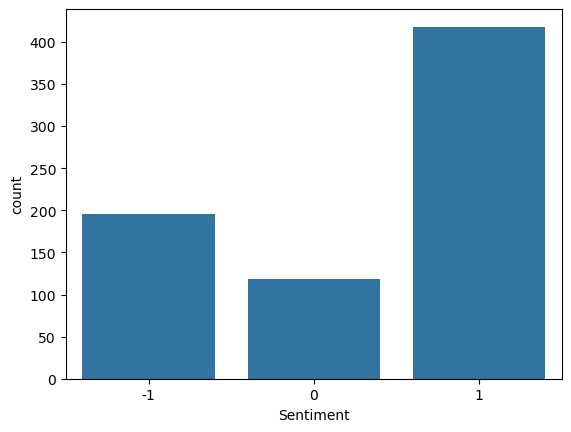

In [15]:
# plot count of sentiment in bar chart
sns.countplot(x='Sentiment', data=relevant_cols)

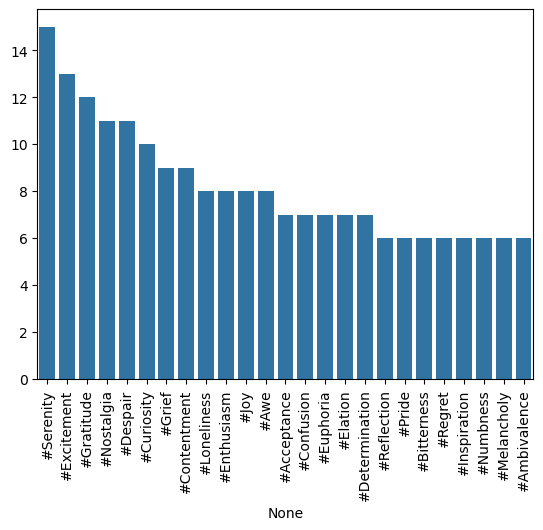

In [16]:
# plot count of hashtags in bar chart
frequent_counts = {k: v for k, v in counts.items() if v > 5}
frequent_counts.pop('')
frequent_counts = pd.Series(frequent_counts)
frequent_counts = frequent_counts.sort_values(ascending=False)
sns.barplot(x=frequent_counts.index, y=frequent_counts.values)
plt.xticks(rotation=90)
plt.show()


## Machine Learning

In [17]:
# get all unique hashtags in the dataset and replace hashtags with labels
def get_hashtags(df):
    hashtags_entries = df['Hashtags'].unique()
    hashtags = set()
    for h in hashtags_entries:
        split = h.split(' ')
        for s in split:
            hashtags.add(s)
    return list(hashtags)

hashtags = get_hashtags(relevant_cols)
hashtags.remove('')

# this is the hashtags tokenization
hashtagsMap = {hashtag: i for i, hashtag in enumerate(hashtags)}

def replace_hashtags(df):
    hashtags_entries = df['Hashtags']
    for i, h in enumerate(hashtags_entries):
        split = h.split(' ')
        labels = []
        for s in split:
            if s in hashtagsMap:
                labels.append(hashtagsMap[s])
        df.at[i, 'Hashtags'] = labels
    return df

relevant_cols = replace_hashtags(relevant_cols)


In [18]:
relevant_cols

,Text,Sentiment,Hashtags
0,Enjoying a beautiful day at the park! ...,1,"[783, 568]"
1,Traffic was terrible this morning. ...,-1,"[344, 644]"
2,Just finished an amazing workout! 💪 ...,1,"[602, 954]"
3,Excited about the upcoming weekend getaway! ...,1,"[852, 130]"
4,Trying out a new recipe for dinner tonight. ...,0,"[60, 550]"
...,...,...,...
727,Collaborating on a science project that receiv...,1,"[259, 289]"
728,Attending a surprise birthday party organized ...,1,"[191, 578]"
729,Successfully fundraising for a school charity ...,0,"[661, 160]"
730,"Participating in a multicultural festival, cel...",0,"[157, 179]"


## Machine Learning

In [28]:
# Tokenize the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

transformed_text = CountVectorizer().fit_transform(relevant_cols['Text'])
X_train, X_test, y_train, y_test = train_test_split(transformed_text, relevant_cols['Sentiment'], test_size=0.2, random_state=42)

In [45]:
# Build Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
accuracy_score(y_test, y_pred)

0.7959183673469388

In [49]:
# Build Random Forest model
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy_score(y_test, y_pred)


0.7142857142857143

In [50]:
# Build custom Neural network model
from keras.models import Sequential
from keras.layers import Dense

# create model
model_NN = Sequential()

# add layers
model_NN.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model_NN.add(Dense(14, activation='relu'))
model_NN.add(Dense(8, activation='relu'))
model_NN.add(Dense(1, activation='tanh'))

# compile model
model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model_NN.fit(X_train.toarray(), y_train, epochs=10, batch_size=10)

# evaluate model
_, accuracy = model_NN.evaluate(X_test.toarray(), y_test)
print('Accuracy: %.2f' % (accuracy*100))

# Save the model
model_NN.save('model_NN.h5')



Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.1784 - loss: 2.4006 
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1562 - loss: -0.6825
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.1651 - loss: -2.4848   
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.2384 - loss: -3.1550
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.3507 - loss: -3.4769
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5757 - loss: -3.5287
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.6549 - loss: -3.5157
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.6540 - loss: -4.2198
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.6651 - loss: -4.0083
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.7116 - loss: -4.0327
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4642 - loss: -1.7887 


Accuracy: 46.94
